In [33]:
import sys
print(sys.version)

2.7.14 |Anaconda, Inc.| (default, Mar 27 2018, 12:30:54) [MSC v.1500 64 bit (AMD64)]


In [34]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np


In [35]:
companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds':  'MCD',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'Symantec': 'SYMC',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mistubishi': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC' }

companies  = sorted(companies_dict.items(),key = lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mistubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Symantec', 'SYMC'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [36]:
#data_source = 'yahoo'
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

yf.pdr_override() # <== that's all it takes :-)


start_date = '2015-01-01'
end_date = '2018-05-31'

panel_data = data.get_data_yahoo(companies_dict.values(),start_date,end_date)

print(panel_data.axes)

[*********************100%***********************]  28 of 28 downloaded
[Index([u'Open', u'High', u'Low', u'Close', u'Adj Close', u'Volume'], dtype='object'), DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-29',
               '2018-05-30', '2018-05-31'],
              dtype='datetime64[ns]', name=u'Date', length=859, freq=None), Index([u'AAPL', u'AMZN', u'AXP', u'BA', u'BAC', u'CVX', u'F', u'GE', u'HMC',
       u'IBM', u'INTC', u'JNJ', u'KO', u'LMT', u'MA', u'MCD', u'MSBHY',
       u'MSFT', u'NAV', u'NOC', u'PEP', u'SNE', u'SYMC', u'TM', u'TXN', u'VLO',
       u'WBA', u'XOM'],
      dtype='object')]


In [37]:
stock_close = panel_data.loc['Close']
stock_open = panel_data.loc['Open']

print(stock_close.iloc[1])

AAPL     106.250000
AMZN     302.190002
AXP       90.559998
BA       129.050003
BAC       17.379999
CVX      108.080002
F         14.760000
GE        24.600000
HMC       28.980000
IBM      159.509995
INTC      35.950001
JNJ      103.790001
KO        42.139999
LMT      189.289993
MA        83.269997
MCD       92.230003
MSBHY     36.119999
MSFT      46.330002
NAV       33.099998
NOC      143.369995
PEP       93.730003
SNE       20.260000
SYMC      25.230000
TM       123.370003
TXN       52.650002
VLO       48.270000
WBA       74.500000
XOM       90.290001
Name: 2015-01-05 00:00:00, dtype: float64


In [38]:
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

print(row)
print(col)

movements = np.zeros([row,col])

for i in range(0,row):
    movements[i,:] = np.subtract(stock_close[i,:],stock_open[i,:])

28
859


In [39]:
for i in range(0,len(companies)):
    print('Company:{},Change:{}'.format(companies[i][0],sum(movements[i][:])))

Company:Apple,Change:25.889882
Company:Amazon,Change:-112.930288
Company:American Express,Change:1.230142
Company:Boeing,Change:122.179899
Company:Bank of America,Change:-6.570024
Company:Chevron,Change:24.810059
Company:Ford,Change:-7.64
Company:General Electrics,Change:-0.609948
Company:Honda,Change:-9.699973
Company:IBM,Change:-2.560026
Company:Intel,Change:21.430044
Company:Johnson & Johnson,Change:9.119864
Company:Coca Cola,Change:8.059978
Company:Lockheed Martin,Change:26.029967
Company:MasterCard,Change:37.149904
Company:McDonalds,Change:30.829986
Company:Mistubishi,Change:27.260034
Company:Microsoft,Change:23.790015
Company:Navistar,Change:-9.769989
Company:Northrop Grumman,Change:62.419995
Company:Pepsi,Change:18.009986
Company:Sony,Change:-4.370035
Company:Symantec,Change:13.540014
Company:Toyota,Change:-23.220061
Company:Texas Instruments,Change:35.849957
Company:Valero Energy,Change:51.369996
Company:Walgreen,Change:-16.740087
Company:Exxon,Change:12.329981


In [40]:
movements.shape

(28L, 859L)

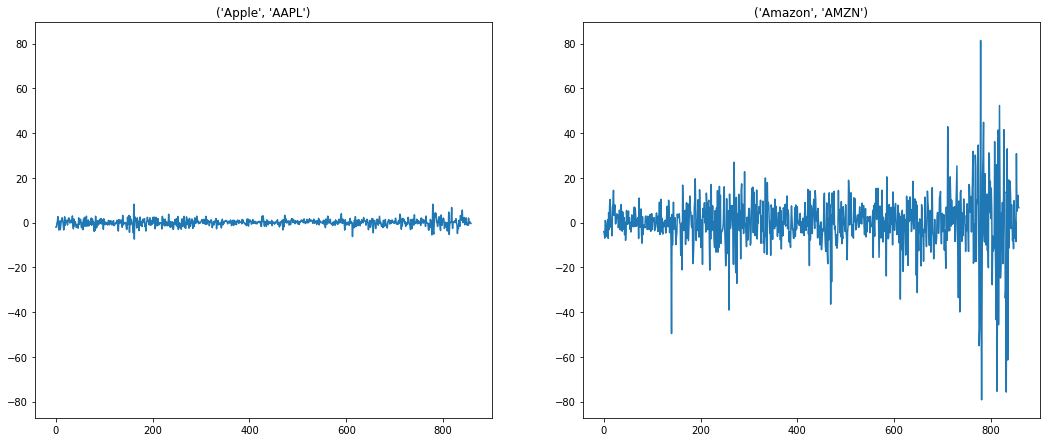

In [41]:
plt.clf
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222,sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [42]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())


0.2734273796005693
-0.30972524052312883
0.0004739047064604204


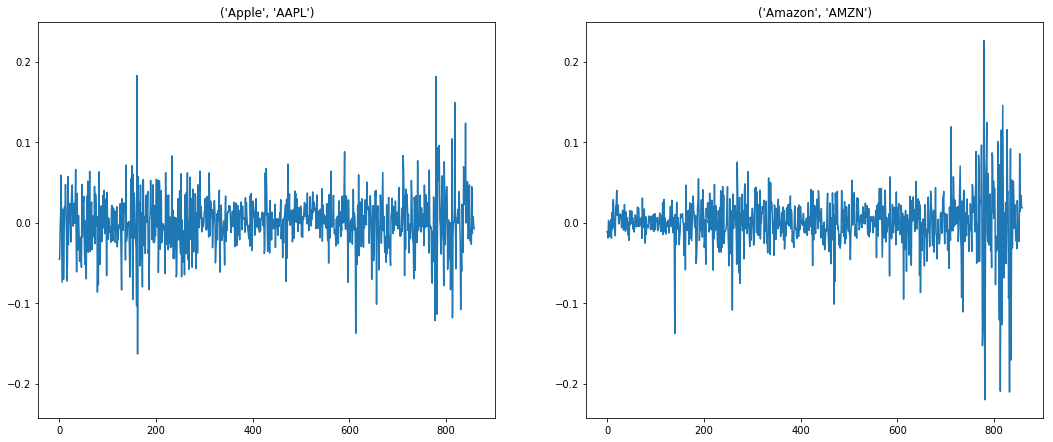

In [43]:
plt.clf
plt.figure(figsize=(18,16))
ax1 =plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222,sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer


normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=10, max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [45]:
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [46]:
print(kmeans.inertia_)

8.54662939419789


In [47]:
import pandas as pd

labels = pipeline.predict(movements)

df = pd.DataFrame({'labels':labels,'companies':companies})

print(df.sort_values('labels'))

                   companies  labels
22          (Symantec, SYMC)       0
0              (Apple, AAPL)       1
1             (Amazon, AMZN)       1
24  (Texas Instruments, TXN)       1
17         (Microsoft, MSFT)       1
14          (MasterCard, MA)       1
10             (Intel, INTC)       1
27              (Exxon, XOM)       2
5             (Chevron, CVX)       2
8               (Honda, HMC)       3
9                 (IBM, IBM)       3
6                  (Ford, F)       3
11  (Johnson & Johnson, JNJ)       3
15          (McDonalds, MCD)       3
16       (Mistubishi, MSBHY)       3
7    (General Electrics, GE)       3
23              (Toyota, TM)       3
21               (Sony, SNE)       3
12           (Coca Cola, KO)       4
20              (Pepsi, PEP)       4
26           (Walgreen, WBA)       5
3               (Boeing, BA)       6
13    (Lockheed Martin, LMT)       6
19   (Northrop Grumman, NOC)       6
2    (American Express, AXP)       7
4     (Bank of America, BAC)       7
2

In [51]:
from sklearn.decomposition import PCA

#visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)

#run kmeans on the reduced data
kmeans = KMeans(n_clusters =10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

print(kmeans.inertia_)

#Create a dataframe

df = pd.DataFrame({'labels':labels,'companies':companies})

#sorted by cluster labels
print(df.sort_values('labels'))



0.11436049852277615
                   companies  labels
8               (Honda, HMC)       0
9                 (IBM, IBM)       0
22          (Symantec, SYMC)       0
23              (Toyota, TM)       0
16       (Mistubishi, MSBHY)       0
2    (American Express, AXP)       0
25      (Valero Energy, VLO)       0
15          (McDonalds, MCD)       1
11  (Johnson & Johnson, JNJ)       1
26           (Walgreen, WBA)       1
1             (Amazon, AMZN)       2
17         (Microsoft, MSFT)       2
14          (MasterCard, MA)       2
5             (Chevron, CVX)       3
7    (General Electrics, GE)       3
27              (Exxon, XOM)       3
19   (Northrop Grumman, NOC)       4
13    (Lockheed Martin, LMT)       4
10             (Intel, INTC)       5
21               (Sony, SNE)       5
24  (Texas Instruments, TXN)       5
0              (Apple, AAPL)       5
18           (Navistar, NAV)       6
6                  (Ford, F)       6
20              (Pepsi, PEP)       7
12           (Coca

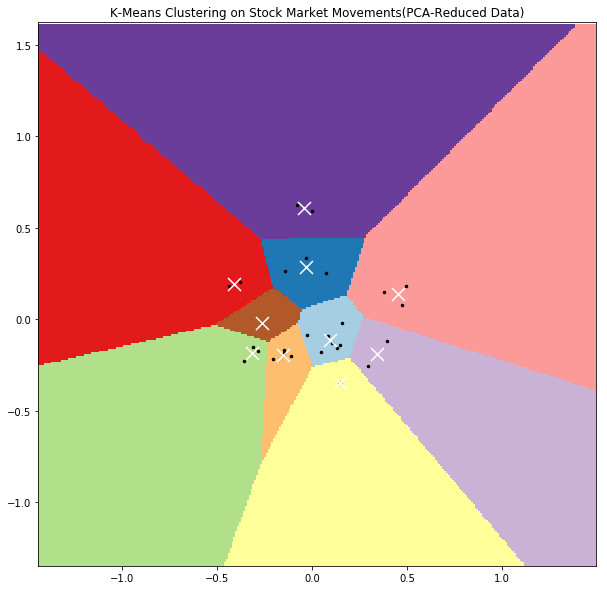

In [53]:
#step size of mesh
h = 0.01

#plot decision boundary
x_min =  reduced_data[:,0].min() -1
x_max = reduced_data[:,0].max() +1

y_min = reduced_data[:,1].min()-1
y_max = reduced_data[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

#obtain labels for each point in the mesh

Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#result into a color plot

Z = Z.reshape(xx.shape)

#define color plot
cmap = plt.cm.Paired

#plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation='nearest',
          extent = (xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,
                    aspect = 'auto', origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize=5)

#plot the centroid of each cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],
           marker='x',s=169, linewidths =3, color ='w',zorder =10)
plt.title('K-Means Clustering on Stock Market Movements(PCA-Reduced Data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()